## Simple Linear Regression

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('data/weight_height.csv')

In [111]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [113]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


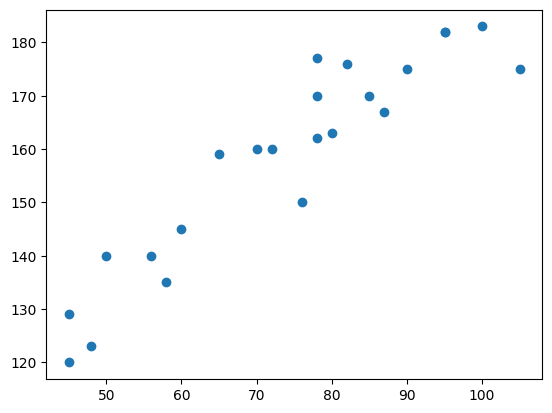

In [114]:
X = df[['Weight']]
y = df['Height']
plt.scatter(X, y)

In [115]:

# dataset split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [116]:
# standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

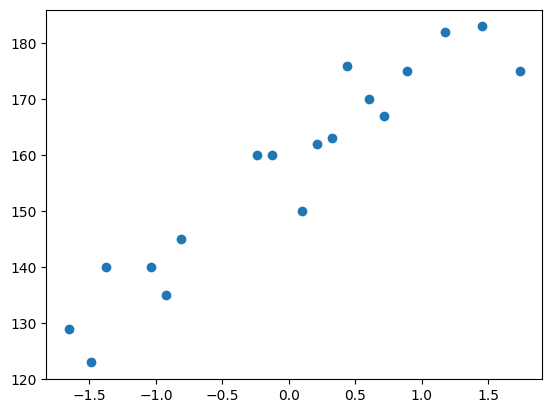

In [117]:
plt.scatter(X_train, y_train)

In [118]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Coeffiecient: ", regressor.coef_[0])
print("intecept: ", regressor.intercept_)

Coeffiecient:  17.034408719095538
intecept:  157.5


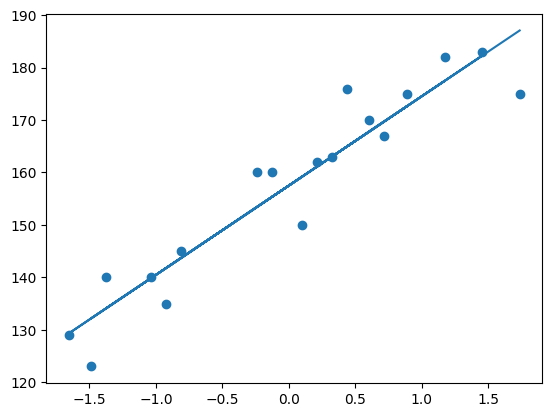

In [119]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train, regressor.predict(X_train))

In [120]:
y_pred = regressor.predict(X_test)

In [121]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [122]:
from sklearn.metrics import r2_score

In [123]:
score=r2_score(y_test,y_pred)
print(score)

0.776986986042344


In [124]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [126]:
## Prediction For new data
regressor.predict(scaler.transform(X))

array([129.3041561 , 141.82375282, 132.19329381, 143.74984463,
       153.38030364, 161.08467086, 163.01076266, 172.64122168,
       177.45645118, 161.08467086, 164.93685446, 177.45645118,
       187.0869102 , 182.27168069, 167.82599217, 161.08467086,
       134.11938561, 148.56507414, 159.15857905, 169.75208397,
       129.3041561 , 139.89766102, 155.30639545])

In [127]:
residuals = y_test-y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

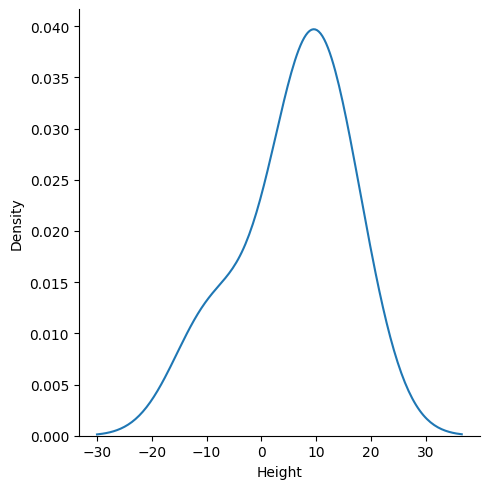

In [128]:
sns.displot(residuals, kind='kde')

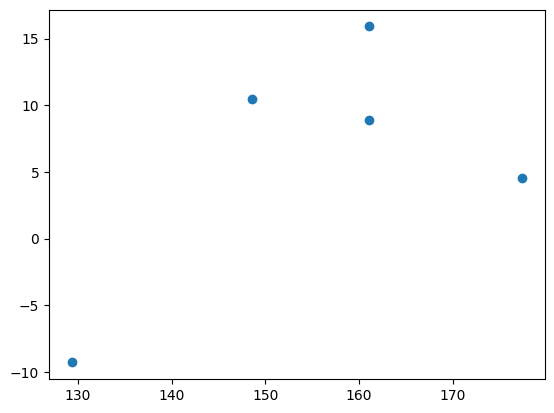

In [129]:
plt.scatter(y_pred, residuals)